<a href="https://colab.research.google.com/github/farydcortes/IA_y_RN/blob/main/A3_Entrenamiento_de_Red_Neuronal_Artificial_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

JEREMY FARYD CORTEES MUÑOZ 1910064 LMV N1

In [ ]:
#importamos las librerias necesarias
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

2.12.0


Importamos los datos de MNIST

In [ ]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Nombramos las clases

In [ ]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

explorar set de datos


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

Pre-procesamos el set de datos

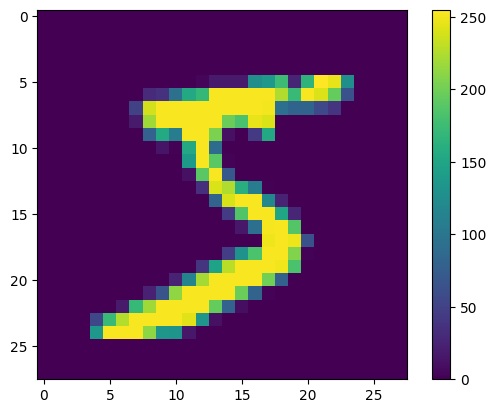

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

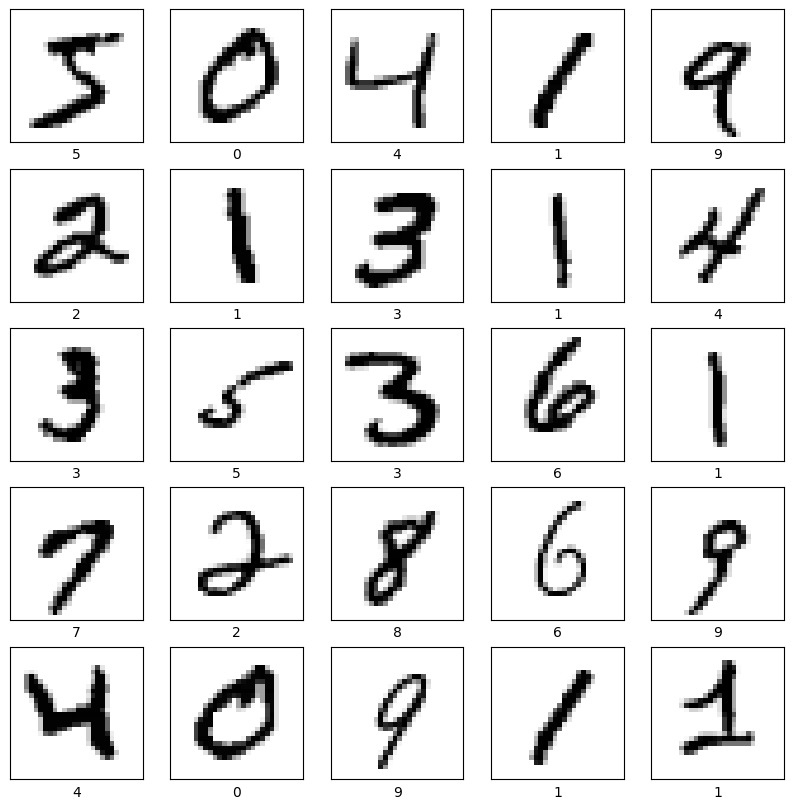

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

configuramos las capas


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

compilamos el modelo

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

entrenamos modelo

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2549 - accuracy: 0.9265
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1092 - accuracy: 0.9674
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0748 - accuracy: 0.9770
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0555 - accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0431 - accuracy: 0.9868
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0343 - accuracy: 0.9896
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0278 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0221 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0192 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.01

Evaluamos la exactitud


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0906 - accuracy: 0.9755 - 1s/epoch - 3ms/step

Test accuracy: 0.9754999876022339


ralizamos predicciones

In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[0]

array([1.3654958e-10, 2.7281213e-12, 2.2058895e-08, 2.6984143e-04,
       1.8059676e-14, 6.3912213e-09, 8.6376105e-17, 9.9972832e-01,
       6.2154260e-09, 1.8638643e-06], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
test_labels[0]

7

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

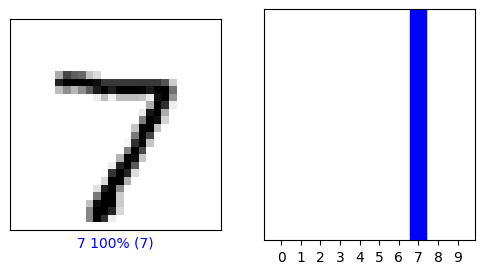

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

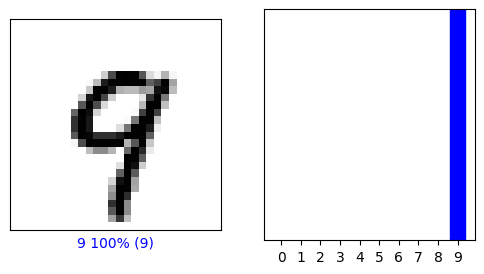

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

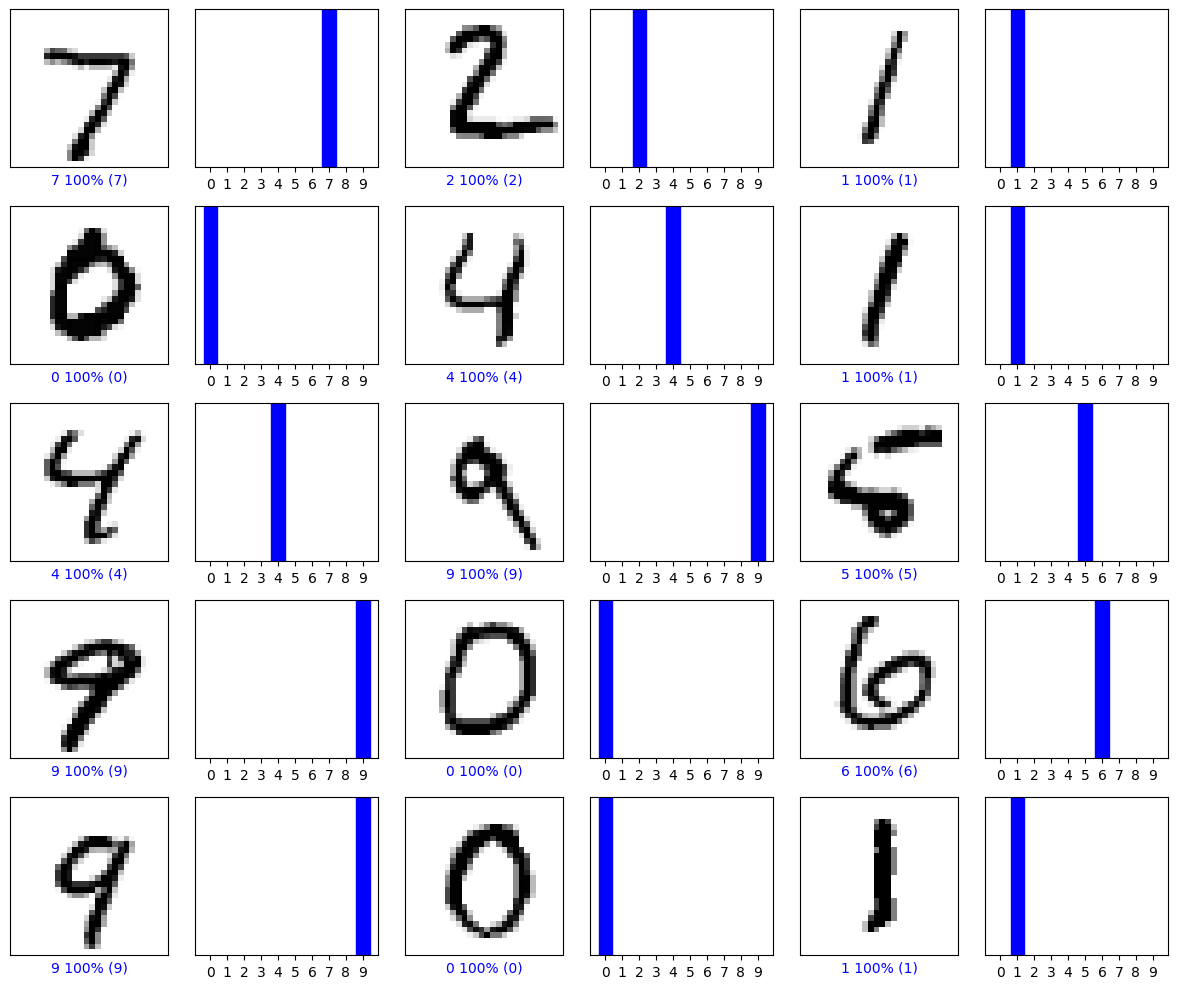

In [ ]:
# en esta parte se muestran las predicicones que hace nuestra red
# El color azul es la predicción correcta mientras que la de color rojo es la incorrecta
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Tomamos una imagen del conjunto de datos de prueba.
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 23ms/step
[[6.7614819e-10 1.4513344e-07 9.9999988e-01 6.5067738e-09 3.5138998e-20
  2.2507481e-10 4.1568657e-10 2.0756226e-18 1.0796422e-11 5.4845161e-19]]


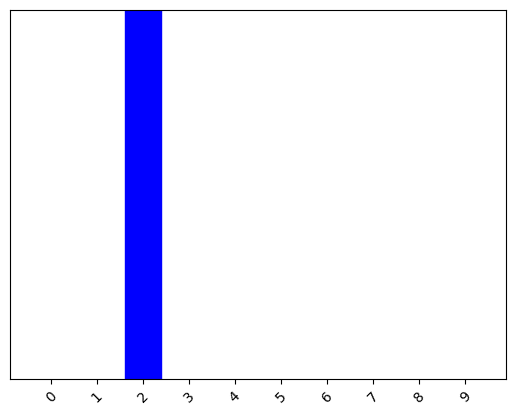

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

2